In [1]:
%run ./constants.ipynb

D:\KISHORE\Binance-Data-Downloader\data\downloaded_data
D:\KISHORE\Binance-Data-Downloader\data\extracted_data


In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import auc

In [3]:
time_period = "1m"
symbol = "BTCUSDT"
path_to_symbol = os.path.join(output_dir,f"{symbol}-{time_period}",f"{symbol}-{time_period}.csv")


In [4]:
df = pd.read_csv(path_to_symbol)
df = df[df["open_time"] < "2023-08-01 05:29:00+05:30"]
test_df = df[df["open_time"] >= "2023-08-01 05:29:00+05:30"]

In [5]:
df.shape

(1871971, 583)

In [6]:
print(df)

                         open_time      open      high       low     close  \
0        2020-01-01 05:31:00+05:30   7182.43   7182.44   7178.75   7179.01   
1        2020-01-01 05:32:00+05:30   7179.01   7179.01   7175.25   7177.93   
2        2020-01-01 05:33:00+05:30   7177.77   7182.60   7177.00   7181.11   
3        2020-01-01 05:34:00+05:30   7179.10   7179.10   7172.94   7175.25   
4        2020-01-01 05:35:00+05:30   7174.71   7177.14   7173.28   7175.61   
...                            ...       ...       ...       ...       ...   
1871966  2023-08-01 05:24:00+05:30  29225.20  29226.00  29225.10  29226.00   
1871967  2023-08-01 05:25:00+05:30  29226.00  29226.10  29219.40  29220.00   
1871968  2023-08-01 05:26:00+05:30  29220.00  29224.40  29219.90  29224.30   
1871969  2023-08-01 05:27:00+05:30  29224.30  29224.40  29220.80  29220.80   
1871970  2023-08-01 05:28:00+05:30  29220.90  29220.90  29220.80  29220.80   

         volume                        close_time  quote_volume

In [7]:
pd.set_option('display.max_columns', None)


In [8]:
df.describe()

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,entry,if_short,if_long,long_target,short_target,long_stop_loss,short_stop_loss,shorts_win_after,longs_win_after,dual_loss,entered_before,HT_TRENDLINE,SAR,SAREXT,T3,APO,BOP,MACD,MACD_signal,MACD_hist,PPO,TRIX,ULTOSC,WILLR,AD,ADOSC,OBV,HT_DCPERIOD,HT_DCPHASE,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_TRENDMODE,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE,TRANGE,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,TSF,VAR,BB_upper_5,BB_middle_5,BB_lower_5,DEMA_5,EMA_5,KAMA_5,MA_5,MIDPOINT_5,MIDPRICE_5,SMA_5,TEMA_5,TRIMA_5,WMA_5,ADX_5,ADXR_5,AROON_up_5,AROON_down_5,AROONOSC_5,CCI_5,CMO_5,DX_5,MFI_5,MINUS_DI_5,MINUS_DM_5,MOM_5,PLUS_DI_5,PLUS_DM_5,ROC_5,ROCP_5,ROCR_5,ROCR100_5,RSI_5,ATR_5,NATR_5,BETA_5,CORREL_5,BB_upper_8,BB_middle_8,BB_lower_8,DEMA_8,EMA_8,KAMA_8,MA_8,MIDPOINT_8,MIDPRICE_8,SMA_8,TEMA_8,TRIMA_8,WMA_8,ADX_8,ADXR_8,AROON_up_8,AROON_down_8,AROONOSC_8,CCI_8,CMO_8,DX_8,MFI_8,MINUS_DI_8,MINUS_DM_8,MOM_8,PLUS_DI_8,PLUS_DM_8,ROC_8,ROCP_8,ROCR_8,ROCR100_8,RSI_8,ATR_8,NATR_8,BETA_8,CORREL_8,BB_upper_13,BB_middle_13,BB_lower_13,DEMA_13,EMA_13,KAMA_13,MA_13,MIDPOINT_13,MIDPRICE_13,SMA_13,TEMA_13,TRIMA_13,WMA_13,ADX_13,ADXR_13,AROON_up_13,AROON_down_13,AROONOSC_13,CCI_13,CMO_13,DX_13,MFI_13,MINUS_DI_13,MINUS_DM_13,MOM_13,PLUS_DI_13,PLUS_DM_13,ROC_13,ROCP_13,ROCR_13,ROCR100_13,RSI_13,ATR_13,NATR_13,BETA_13,CORREL_13,BB_upper_21,BB_middle_21,BB_lower_21,DEMA_21,EMA_21,KAMA_21,MA_21,MIDPOINT_21,MIDPRICE_21,SMA_21,TEMA_21,TRIMA_21,WMA_21,ADX_21,ADXR_21,AROON_up_21,AROON_down_21,AROONOSC_21,CCI_21,CMO_21,DX_21,MFI_21,MINUS_DI_21,MINUS_DM_21,MOM_21,PLUS_DI_21,PLUS_DM_21,ROC_21,ROCP_21,ROCR_21,ROCR100_21,RSI_21,ATR_21,NATR_21,BETA_21,CORREL_21,BB_upper_30,BB_middle_30,BB_lower_30,DEMA_30,EMA_30,KAMA_30,MA_30,MIDPOINT_30,MIDPRICE_30,SMA_30,TEMA_30,TRIMA_30,WMA_30,ADX_30,ADXR_30,AROON_up_30,AROON_down_30,AROONOSC_30,CCI_30,CMO_30,DX_30,MFI_30,MINUS_DI_30,MINUS_DM_30,MOM_30,PLUS_DI_30,PLUS_DM_30,ROC_30,ROCP_30,ROCR_30,ROCR100_30,RSI_30,ATR_30,NATR_30,BETA_30,CORREL_30,BB_upper_34,BB_middle_34,BB_lower_34,DEMA_34,EMA_34,KAMA_34,MA_34,MIDPOINT_34,MIDPRICE_34,SMA_34,TEMA_34,TRIMA_34,WMA_34,ADX_34,ADXR_34,AROON_up_34,AROON_down_34,AROONOSC_34,CCI_34,CMO_34,DX_34,MFI_34,MINUS_DI_34,MINUS_DM_34,MOM_34,PLUS_DI_34,PLUS_DM_34,ROC_34,ROCP_34,ROCR_34,ROCR100_34,RSI_34,ATR_34,NATR_34,BETA_34,CORREL_34,BB_upper_50,BB_middle_50,BB_lower_50,DEMA_50,EMA_50,KAMA_50,MA_50,MIDPOINT_50,MIDPRICE_50,SMA_50,TEMA_50,TRIMA_50,WMA_50,ADX_50,ADXR_50,AROON_up_50,AROON_down_50,AROONOSC_50,CCI_50,CMO_50,DX_50,MFI_50,MINUS_DI_50,MINUS_DM_50,MOM_50,PLUS_DI_50,PLUS_DM_50,ROC_50,ROCP_50,ROCR_50,ROCR100_50,RSI_50,ATR_50,NATR_50,BETA_50,CORREL_50,BB_upper_55,BB_middle_55,BB_lower_55,DEMA_55,EMA_55,KAMA_55,MA_55,MIDPOINT_55,MIDPRICE_55,SMA_55,TEMA_55,TRIMA_55,WMA_55,ADX_55,ADXR_55,AROON_up_55,AROON_down_55,AROONOSC_55,CCI_55,CMO_55,DX_55,MFI_55,MINUS_DI_55,MINUS_DM_55,MOM_55,PLUS_DI_55,PLUS_DM_55,ROC_55,ROCP_55,ROCR_55,ROCR100_55,RSI_55,ATR_55,NATR_55,BETA_55,CORREL_55,BB_upper_89,BB_middle_89,BB_lower

In [9]:
df.select_dtypes(include="object")

,open_time,close_time
0,2020-01-01 05:31:00+05:30,2020-01-01 05:31:59.999000+05:30
1,2020-01-01 05:32:00+05:30,2020-01-01 05:32:59.999000+05:30
2,2020-01-01 05:33:00+05:30,2020-01-01 05:33:59.999000+05:30
3,2020-01-01 05:34:00+05:30,2020-01-01 05:34:59.999000+05:30
4,2020-01-01 05:35:00+05:30,2020-01-01 05:35:59.999000+05:30
...,...,...
1871966,2023-08-01 05:24:00+05:30,2023-08-01 05:24:59.999000+05:30
1871967,2023-08-01 05:25:00+05:30,2023-08-01 05:25:59.999000+05:30
1871968,2023-08-01 05:26:00+05:30,2023-08-01 05:26:59.999000+05:30
1871969,2023-08-01 05:27:00+05:30,2023-08-01 05:27:59.999000+05:30


In [10]:
df.drop(["open_time", "close_time"], axis=1, inplace=True)

In [12]:
column_names = df.columns


missing_df = pd.DataFrame({
    "name" : column_names,
    "missing": df.isnull().mean().tolist()
}, columns=["name", "missing"])

missing_df["missing"] = missing_df["missing"] * 100

missing_df.sort_values("missing", ascending=False, inplace=True)


In [13]:
missing_df[:10]

,name,missing
19,entered_before,99.897434
17,longs_win_after,64.335131
16,shorts_win_after,64.300622
559,ADXR_233,0.037233
555,TEMA_233,0.037180
523,ADXR_200,0.031945
519,TEMA_200,0.031892
558,ADX_233,0.024840
548,DEMA_233,0.024787
487,ADXR_144,0.022970


In [14]:
df.drop(["entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [15]:
df.replace(np.nan, -500, inplace=True)

In [16]:
df.if_long.value_counts()

-1    1204334
 1     667636
 0          1
Name: if_long, dtype: int64

In [19]:
df["if_long"] = df["if_long"].replace(-1, 0)

In [20]:
df.if_long.value_counts()

0    1204335
1     667636
Name: if_long, dtype: int64

In [21]:
df["if_short"] = df["if_short"].replace(-1, 0)

In [22]:
df.if_short.value_counts()

0    1203689
1     668282
Name: if_short, dtype: int64

### Long model

In [23]:
long_df = df.drop("if_short", axis=1)

In [24]:
long_y = df["if_long"]

In [25]:
long_x = long_df.drop("if_long", axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(long_x, long_y, test_size=0.1)

In [ ]:
# long_x.columns.tolist()

In [ ]:
# columns_to_drop = ['open',
#  'high',
#  'low',
#  'close',
#  'volume',
#  'quote_volume',
#  'count',
#  'taker_buy_volume',
#  'taker_buy_quote_volume']

In [ ]:
# long_x.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [27]:
long_clf = RandomForestClassifier(max_depth=100, random_state=0)

In [28]:
long_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=100, random_state=0)

## Save model

In [29]:
import pickle

# Save the model to a file
with open("long_clf_210823.pkl", "wb") as f:
    pickle.dump(long_clf, f)

## Load  model

In [ ]:
# Load the saved model from a file
with open("long_clf_210823.pkl", "rb") as f:
    long_clf = pickle.load(f)

In [30]:
y_pred = long_clf.predict(X_test)

In [31]:
long_clf.score(X_test, y_test)

0.9113398647421447

In [32]:
long_clf.classes_

array([0, 1], dtype=int64)

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=long_clf.classes_)

In [34]:
cm

array([[118010,   2190],
       [ 14407,  52591]], dtype=int64)

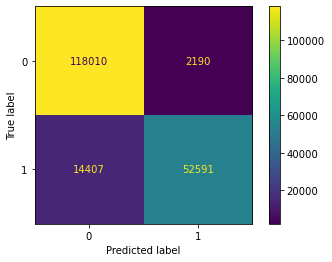

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=long_clf.classes_)

disp.plot()


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    120200
           1       0.96      0.78      0.86     66998

    accuracy                           0.91    187198
   macro avg       0.93      0.88      0.90    187198
weighted avg       0.92      0.91      0.91    187198



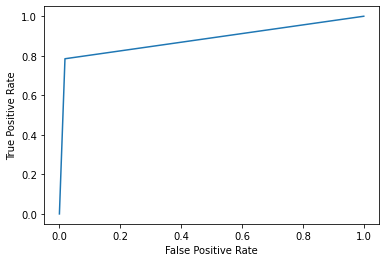

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=long_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [38]:
auc(fpr, tpr)

0.8833720481585885

### Short model

In [ ]:
short_df = df.drop("if_long", axis=1)

In [ ]:
short_y = df["if_short"]

In [ ]:
short_x = short_df.drop("if_short", axis=1)

In [ ]:
short_x.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(short_x, short_y, test_size=0.1)

In [ ]:
short_clf = RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
short_clf.fit(X_train, y_train)

In [ ]:
# Save the model to a file
with open("short_clf.pkl", "wb") as f:
    pickle.dump(short_clf, f)

In [ ]:
y_pred = short_clf.predict(X_test)

In [ ]:
short_clf.score(X_test, y_test)

In [ ]:
short_clf.classes_

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=short_clf.classes_)

In [ ]:
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=short_clf.classes_)

disp.plot()


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=short_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
auc(fpr, tpr)

### Testing

In [ ]:
btc_df = pd.read_csv(path_daily)

In [ ]:
btc_df.shape

In [ ]:
btc_df["open_time"] = pd.to_datetime(btc_df["open_time"])
btc_df["close_time"] = pd.to_datetime(btc_df["close_time"])

In [ ]:
btc_df.open_time

In [ ]:
# btc_df = btc_df[(btc_df['open_time'] > '2023-01-17') & (btc_df['open_time'] < '2023-01-18')]

In [ ]:
# Drop columns

# btc_df.drop(["open_time", "close_time", 'open',
#  'high',
#  'low',
#  'close',
#  'volume',
#  'quote_volume',
#  'count',
#  'taker_buy_volume',
#  'taker_buy_quote_volume', "entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [ ]:
btc_df.shape

In [ ]:
btc_df = btc_df[1:]

In [ ]:
btc_df.replace(np.nan, -500, inplace=True)

In [ ]:
btc_df["if_short"].value_counts()

In [ ]:
btc_df["if_short"] = btc_df["if_short"].replace(-1, 0)

In [ ]:
btc_df["if_short"].value_counts()

In [ ]:
btc_df["if_long"] = btc_df["if_long"].replace(-1, 0)

In [ ]:
short_y_act = btc_df["if_short"]
long_y_act = btc_df["if_long"]

In [ ]:
btc_df.drop([
    "if_long", "if_short", 'entered_before', 'longs_win_after',
    'shorts_win_after', 
    'open_time', 'close_time'
],
            axis=1,
            inplace=True)

In [ ]:
short_y_pred = short_clf.predict(btc_df)

In [ ]:
def accuracy(y_act, y_pred):
    correct = 0
    for i in range(len(y_act)):
        if y_act[i] == y_pred[i]:
            correct += 1
    return (correct / len(y_act)) * 100


In [ ]:
accuracy(list(short_y_act), list(short_y_pred)) 

In [ ]:
long_y_pred = long_clf.predict(btc_df)

In [ ]:
accuracy(list(long_y_act), list(long_y_pred)) 

In [ ]:
long_y_act

In [ ]:
y_pred

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(short_clf, short_x, short_y, cv=5)

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
scores = cross_val_score(long_clf, long_x, long_y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))